# Análise dos filmes e séries da Netflix

![image info](https://523019-1664874-raikfcquaxqncofqfm.stackpathdns.com/wp-content/uploads/2020/10/Netflix.jpg)

A Netflix foi a primeira empresa a popularizar a ideia de "streaming" de filmes e séries e hoje a empresa é mundialmente conhecida e a mais popular do ramo. Um fator muito importante que fez a Netflix chegar onde chegou foi no estudo dos dados dos seus assinantes e na recomendação de filmes ou séries baseado no gosto dos assinantes. Por exemplo, digamos que alguém viu vários filmes de terror, é ideal que a plataforma indique outros filmes desse mesmo gênero para essa pessoa. Assim fará com que o cliente fique mais tempo na plataforma e a empresa ganhe mais dinheiro. Portanto urge a necessidade de um estudo sobre os seus dados e no Kaggle(https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies) foi disponibilizado os dados dos filmes e séries da netflix junto com dados dos seus atores e suas notas e popularidade em sites de crítica de filmes


Temos dois arquivos .csv que são o _titles.csv_ e o _credits.csv_. O primeiro apresenta dados sobre cada filme isoladamente contendo informações técnicas do filme como tamanho título, faixa etária, etc. O segundo contém quem foi creditado pelo filme como ator ou diretor. Baseado nesses dados vamos devemos fazer as seguintes tarefas:

1. Desenvolver um sistema de recomendação baseado em conteúdo usando os gêneros e/ou descrições.
2. Identificando os principais conteúdos disponíveis no streaming.
3. Análise de rede sobre o elenco dos títulos.
4. Análise exploratória de dados para encontrar insights interessantes.



Nesse sentido, vamos separar a nossa análise da seguinte forma:

1. Análise Exploratória
- 2.1 Filmes
- 2.2 Séries
2. Análise da rede de elenco
3. Sistema de Recomendação
4. Conclusão

# Análise Exploratória

A primeira parte do nosso projeto é a Análise Exploratória. Ela é a responsável pela:

- Preparação e análise dos nossos dados; 
- Remoção de outliers;
- Tratamento de valores faltantes;
- Visualização de dados;
- Verificação da tendêndica dos dados.

Por causa disso é a parte mais importante e a mais demorada que temos aqui. A primeira coisa que será feita é o carregamento das bibliotecas e dos arquivos. Para facilitar a visualização mais limpa eu deixei todas as funções em um arquivo `exploratory.py` e caso queira ver em detalhes é só acessar o arquivo.

In [1]:
from exploratory import *
from templateplot import *
%reload_ext autoreload
%autoreload 2

In [2]:
credits = loadcsv('credits.csv')
titles = loadcsv('titles.csv')

In [3]:
credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [4]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


Nota-se que no arquivo _credits.csv_ temos as seguintes colunas:

- _person_id_
- _id_
- _name_
- _character_
- _role_

E em _titles.csv_ temos:

- _id_
- _title_
- _type_
- _description_
- _release_year_
- _age_certification_
- _runtime_
- _genres_
- _production_countries_
- _seasons_
- _imdb_id_
- _imdb_score_
- _imdb_votes_
- _tmdb_popularity_
- _tmdb_score_

Primeiro iremos trabalhar com _titles.csv_ e ao analisar esse arquivo percebe-se que a coluna _type_ está relacionada com _seasons_, pois os Filmes não têm temporadas e por isso iremos separar em dois data frames diferentes para depois retornar a eles juntos.

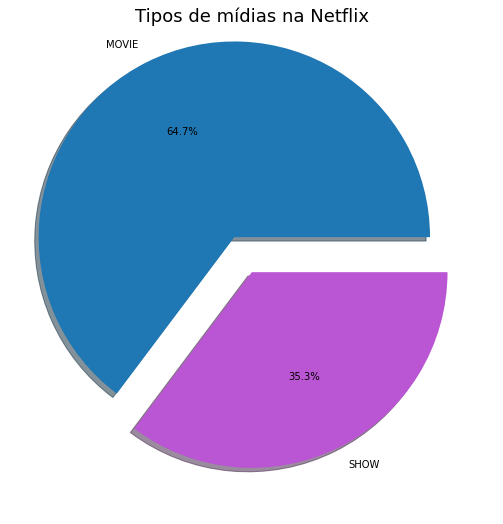

In [5]:
groupBar(
    titles,
    'type',
    'runtime',
    'count',
    'Tipos de mídias na Netflix',
    pieGraph,
)

In [6]:
movie = check(titles,'type','MOVIE')
show = check(titles,'type','SHOW')
del movie['seasons']
del movie['type']
del show['seasons']
del show['type']
movie.shape

(3759, 13)

In [7]:
movie.head()

,id,title,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],tt0070047,8.1,391942.0,95.337,7.7
6,tm14873,Dirty Harry,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'crime', 'action']",['US'],tt0066999,7.7,153463.0,14.745,7.5


Ao investigar um pouco os dados percebe-se que temos valores faltantes no banco de dados. Desde filmes sem _score_ até filmes sem classificação indicativa. Para tratar esses dados faltantes é perceptível que quando tem pouca popularidade, geralmente, implica que ele não terá nota, afinal se ninguém viu não tem nota. Portanto, para o score e para a popularidade (refiro popularidade como tanto _tmdb_popularity_ e _imdb_votes_) para os valores faltantes vai ser igual a zero. No caso dos valores faltantes da classificação percebe-se que 60% dos filmes não tem classificação, pode ser erro do database ou realmente não tem e isso fará toda a diferença no futuro, portanto colocarei como "NR". Por fim, as tabelas _genres_ e _production_countries_ é para serem colunas com arrays, porém não estão sendo carregadas dessa forma, portanto irei corrigir isso.

In [8]:
movie = cleaningNan(movie,'imdb_votes',0)
movie = cleaningNan(movie,'imdb_score',0)
movie = cleaningNan(movie,'tmdb_popularity',0)
movie = cleaningNan(movie,'tmdb_score',0)
movie = cleaningNan(movie,'age_certification','NR')
movie = cleaningvector(movie,'genres')
movie = cleaningvector(movie,'production_countries')

## Filmes

Começando com a nossa análise avaliando a evolução temporal da quantidade de filmes por ano na Netlflix. É perceptível que houve um crescimento exponencial nos anos 2000 em número de filmes. A Netflix como um streaming que deseja alcançar um vasto público tende a pegar filmes mais modernos. Além disso percebemos uma queda a partir de 2020, causada pela pandemia.

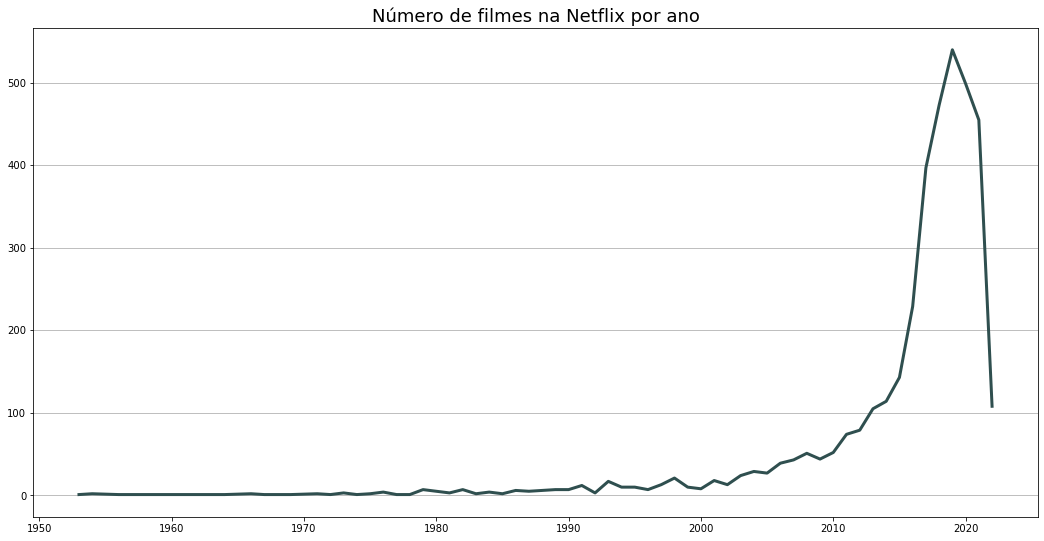

In [9]:
groupBar(
    movie,
    'release_year',
    'runtime',
    'count',
    'Número de filmes na Netflix por ano',
    temporalplot,
)

Ao avaliarmos a média da duração percebe-se que os filmes antes dos anos 2000 tinham muita variação de tempo mas com o passar do tempo isso foi regularizando, não se sabe se exatamente algo que aconteceu ou escolha do acaso da plataforma.

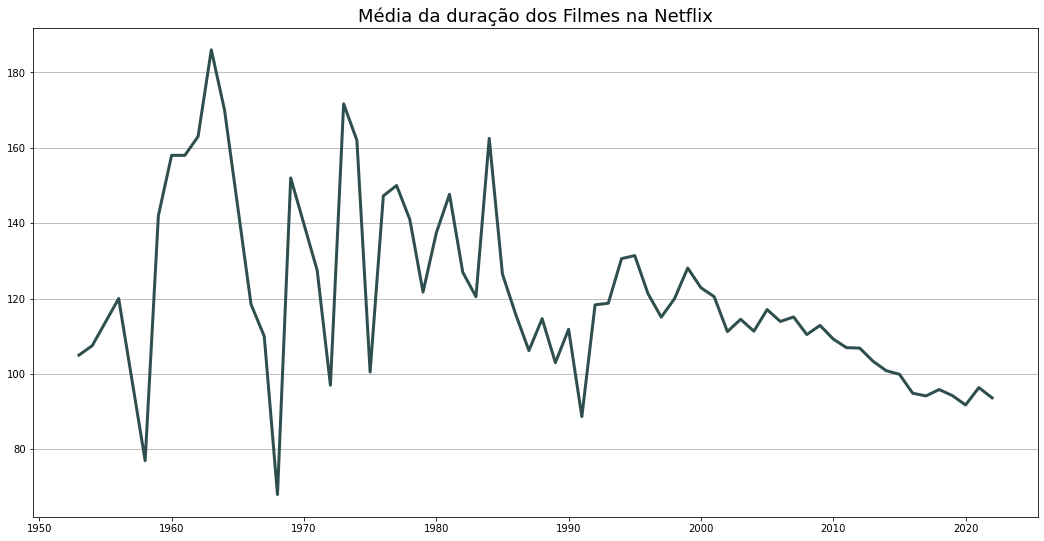

In [10]:
groupBar(
    movie,
    'release_year',
    'runtime',
    'mean',
    'Média da duração dos Filmes na Netflix',
    temporalplot,
)

Ao analisarmos o boxplot nota-se que a média está perto de 100 minutos e o máximo e mínimo estão próximos de 150 e 50 respectivamente, contudo temos vários outliers tanto para cima quanto para baixo. Os maiores valores são de filmes realmente grandes, como o _Irishman_ no caso dos valores menores são de curtas ou especiais de TV. Além disso percebi um erro nos dados como _Dad Stop Embarassing Me!_ que conta como _movie_ mas ao olhar o site do IMDB (https://www.imdb.com/title/tt14465872/) ele é o 6 episódio de uma série, portanto é necessário olhar com mais cuidado.

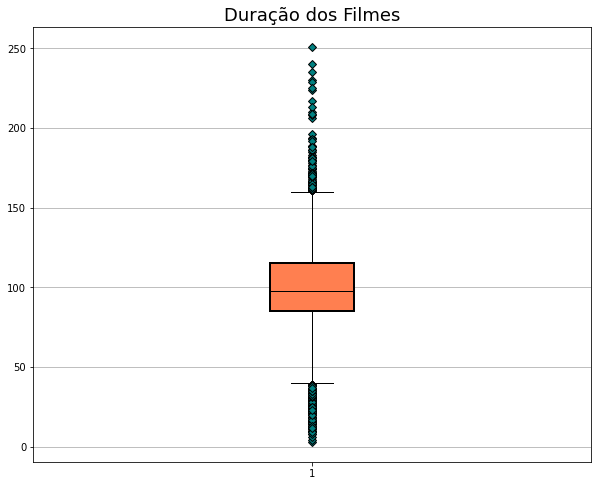

In [11]:
boxGraph(movie['runtime'].values,'Duração dos Filmes')

Aqui por curiosidade vemos os filmes mais populares do IMDB e do TMDB.

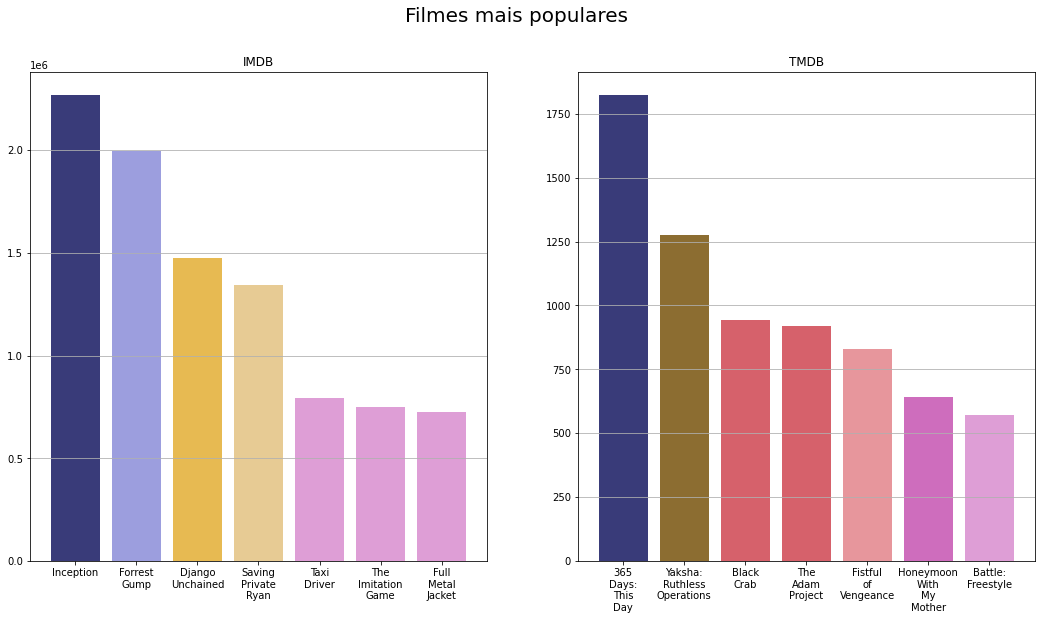

In [28]:
groupBar(movie,
         ['title','title'],
         ['imdb_votes','tmdb_popularity'],
         ['sum','mean'],
         ['Filmes mais populares','IMDB','TMDB'],
         [barGraph,barGraph], 
         )

Agora avaliando a classificação etária vamos analisar a popularidade no IMDB e no TMDB e o número de filmes da Netflix. Os dois primeiros mostram a preferência dos votantes nos sites. No IMDB temos uma preferência nos filmes _Rated R_ e _PG-13_, no TMDB temos a mesma preferência contudo vemos que os _NR_ tem maior dominância e isso atrapalha a nossa análise, visto que ele poderia ser de quaisquer outras classificações etárias, apesar disso é seguido também como R e _PG-13_ como mais populares. Por fim, a grande quantidade de _NR_ da Netflix atrapalha os dados, porém percebemos o mesmo resultado do IMDB e TMDB

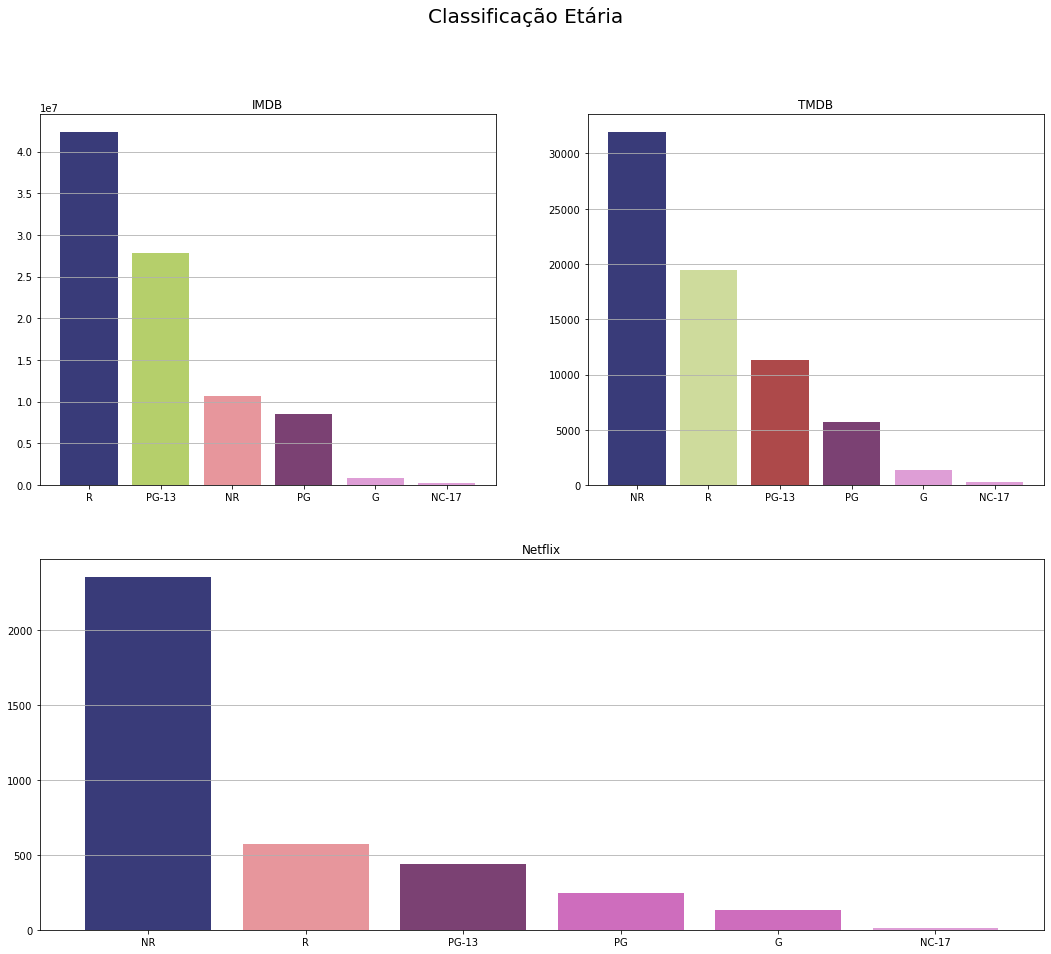

In [29]:
groupBar(movie,
         ['age_certification','age_certification','age_certification'],
         ['imdb_votes','tmdb_popularity','tmdb_popularity'],
         ['sum','sum','count'],
         'Classificação Etária',
         [barGraph,barGraph,barGraph],
)

Agora para tratarmos do gênero e dos países na qual foram produzidos vamos ter que ajeitar os dados utilizando a função `explode` do pandas. Assim teremos um novo dataset com os devidos gêneros e países.

In [30]:
explode = movie.explode('genres')
explode = explode.explode('production_countries')

Percebe-se que nos três casos vemos o mesmo padrão de preferência no TMDB, IMDB e do serviço de streaming. Vê-se uma preferÊncia por filmes mais "cinematográficos" como ação, comédia, thriller, drama, sci-fi, etc. Filmes que no geral são mais fantásticos ou propositalmente mais exagerados.

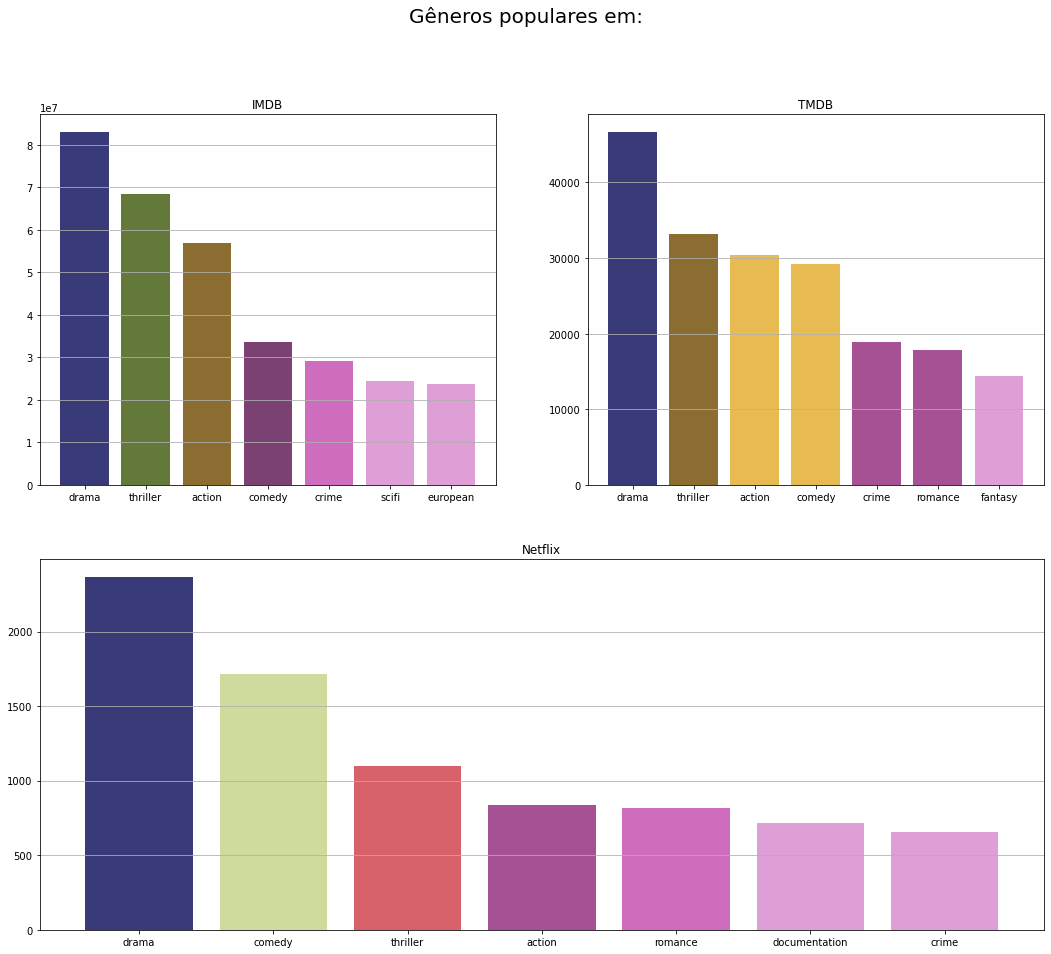

In [31]:
groupBar(explode,
         ['genres','genres','genres'],
         ['imdb_votes','tmdb_popularity','tmdb_popularity'],
         ['sum','sum','count'],
         'Gêneros populares em:',
         [barGraph,barGraph,barGraph],
         )

Em contrapartida, nos scores do IMDB e do TMDB (não tem os dados da votação da Netflix) percebe-se uma diferença. Agora os gêneros com maior score são os mais realistas como history, reality, war, sport, etc.

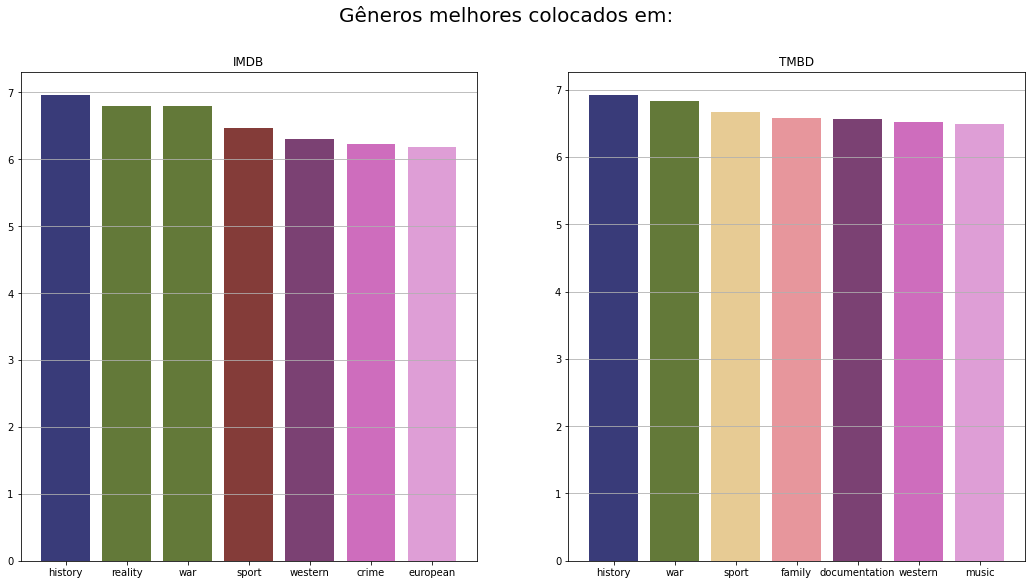

In [32]:
groupBar(explode,
         ['genres','genres'],
         ['imdb_score','tmdb_score'],
         ['mean','mean'],
         ['Gêneros melhores colocados em:','IMDB','TMBD'],
         [barGraph,barGraph],
         )

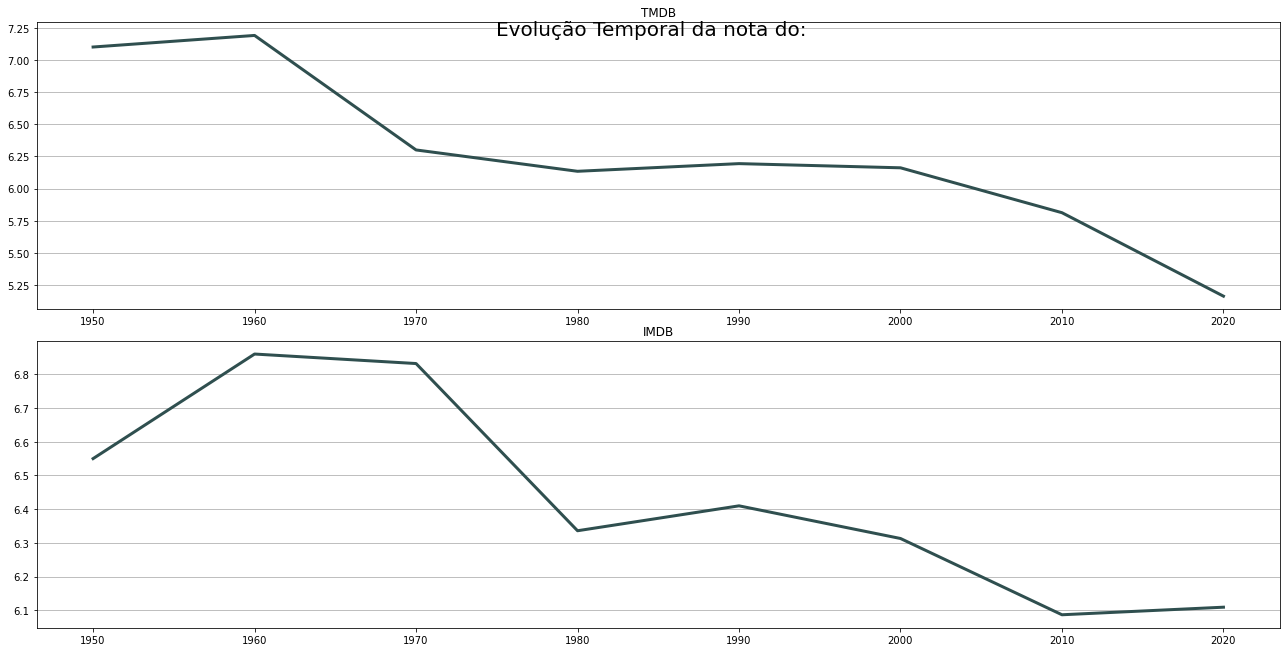

In [33]:
x,y = gridYear(movie,'imdb_score',10)
x_,y_ = gridYear(movie,'tmdb_score',10)
generateGraphs([x,x_],
               [y,y_],
               ['Evolução Temporal da nota do:','TMDB','IMDB'],
               [temporalplot,temporalplot],
              'up')

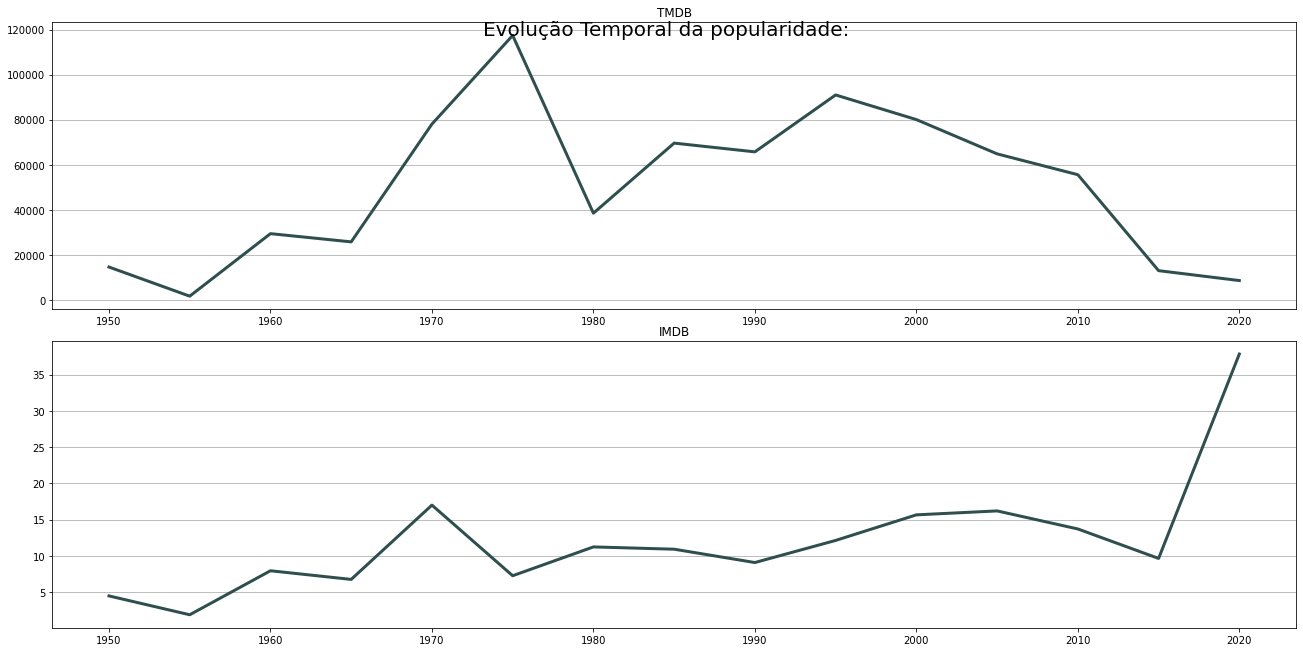

In [34]:
x,y = gridYear(movie,'imdb_votes',5)
x_,y_ = gridYear(movie,'tmdb_popularity',5)
generateGraphs([x,x_],
               [y,y_],
               ['Evolução Temporal da popularidade:','TMDB','IMDB'],
               [temporalplot,temporalplot],
              'up')

In [ ]:
scatterGraph(movie['imdb_score'],movie['imdb_votes'])

In [ ]:
scatterGraph(movie['tmdb_score'],movie['tmdb_popularity'])

In [ ]:
scatterGraph(movie['imdb_score'],movie['tmdb_score'])